In [2]:
import numpy as np
#使用make_classification构造1000个样本，每个样本有20个feature
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)
#存为dataframe格式
from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])),columns = list(range(20)) + ["class"])
df[:6]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0
5,-0.262645,0.327590,0.997845,-1.577903,-0.828981,-0.202735,0.825932,-0.489252,0.849912,-0.035563,...,0.935624,1.741002,1.930498,0.069474,-0.643267,-0.257866,0.260081,-0.001670,-1.639319,1.0


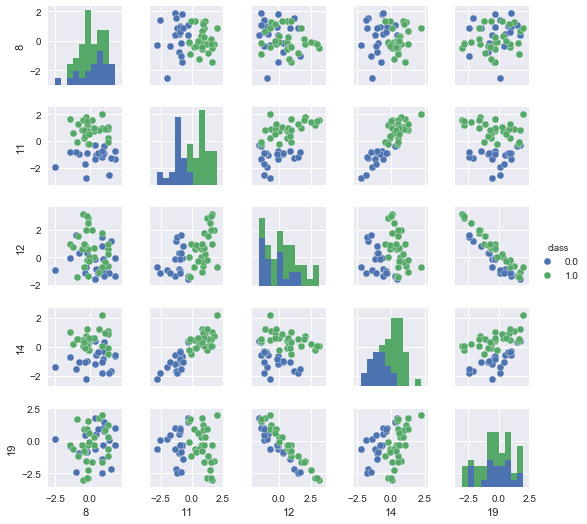

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#使用pairplot去看不同特征维度pair下数据的空间分布状况
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=1.5)
plt.show()

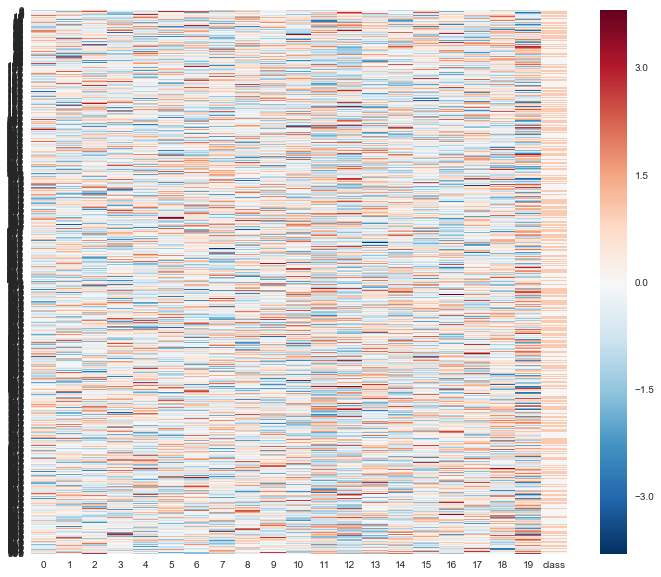

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
_ = sns.heatmap(df, annot=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


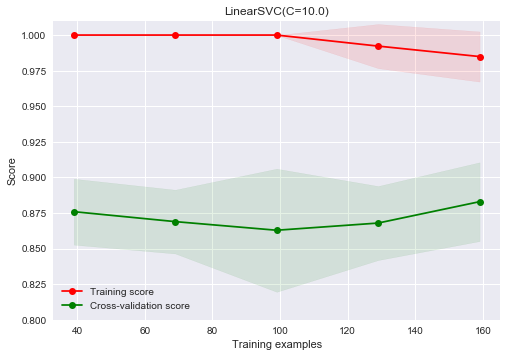

In [6]:
from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve
#绘制学习曲线，以确定模型的状况
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    """

    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()

#少样本的情况情况下绘出学习曲线
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.05, 0.2, 5))

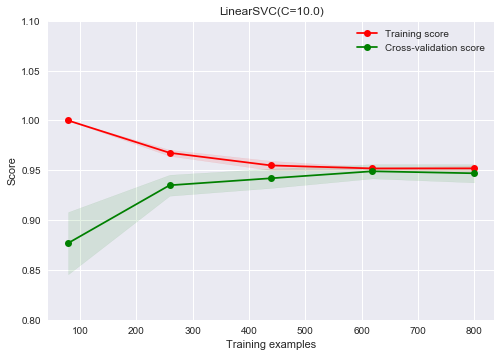

In [7]:
#增大一些样本量
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

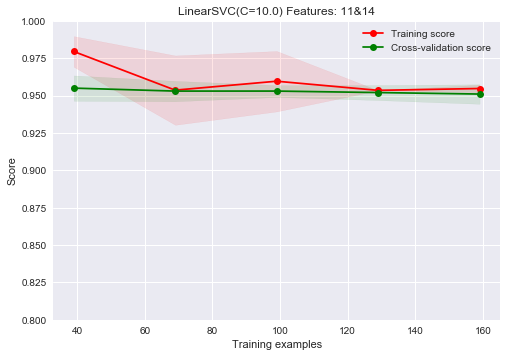

In [8]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0) Features: 11&14", X[:, [11, 14]], y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

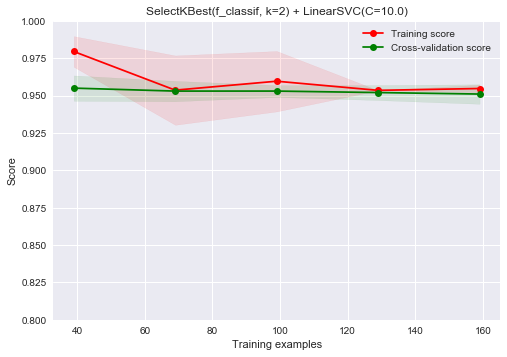

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest(f_classif, k=2) 会根据Anova F-value选出 最好的k=2个特征

plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), # select two features
                               ("svc", LinearSVC(C=10.0))]), "SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

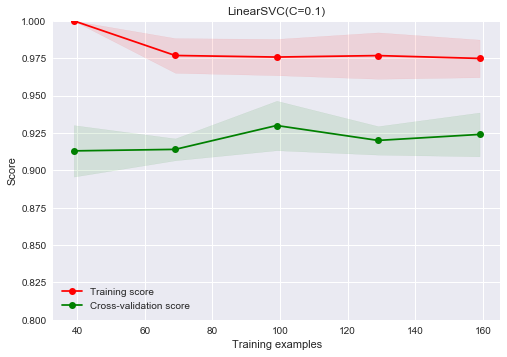

In [10]:
plot_learning_curve(LinearSVC(C=0.1), "LinearSVC(C=0.1)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


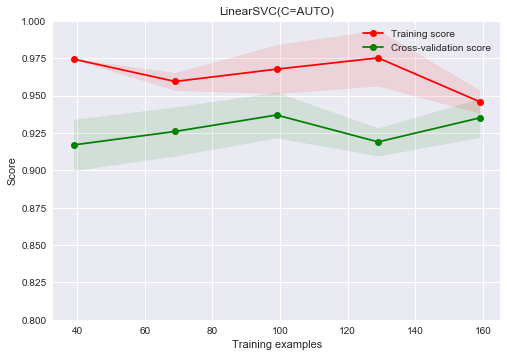

Chosen parameter on 100 datapoints: {'C': 0.001}


In [11]:
from sklearn.grid_search import GridSearchCV
estm = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(estm, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print("Chosen parameter on 100 datapoints: %s" % estm.fit(X[:500], y[:500]).best_params_)

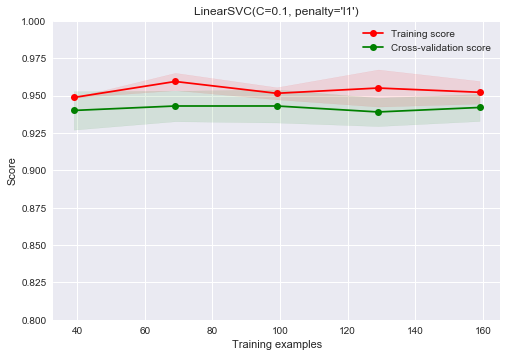

In [12]:
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False), "LinearSVC(C=0.1, penalty='l1')", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

In [19]:
estm = LinearSVC(C=0.1, penalty='l1', dual=False)
estm.fit(X[:450], y[:450])  # 用450个点来训练
print("Coefficients learned: %s" % estm.coef_)
print("Coefficients learned: %s" % len(estm.coef_[0]))
print("Non-zero coefficients: %s" % np.nonzero(estm.coef_)[1])

Coefficients learned: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.22363855e-02
   -1.66091377e-02   4.41090517e-03  -4.32349002e-02   3.85091374e-02
    0.00000000e+00   0.00000000e+00   6.27267734e-02   1.22235235e+00
    1.18918157e-01  -9.42547309e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   9.27620707e-02   0.00000000e+00]]
Coefficients learned: 20
Non-zero coefficients: [ 3  4  5  6  7 10 11 12 13 18]


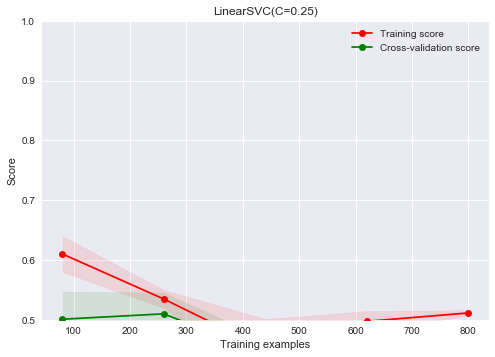

In [22]:
#构造一份环形数据
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=2)
#绘出学习曲线
plot_learning_curve(LinearSVC(C=0.25),"LinearSVC(C=0.25)",X, y, ylim=(0.5, 1.0),train_sizes=np.linspace(.1, 1.0, 5))

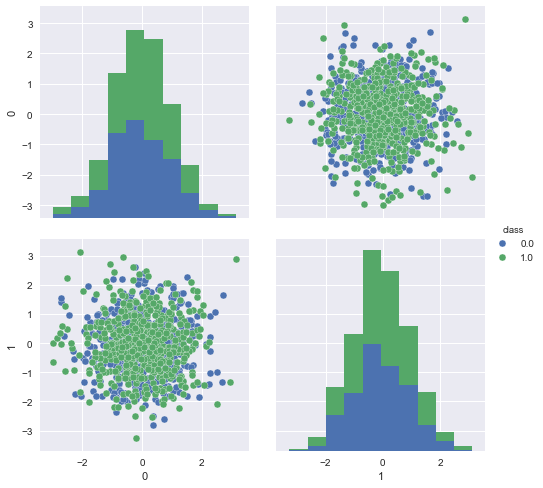

In [28]:
#plt.clf()
f = DataFrame(np.hstack((X, y[:, None])), columns = list(range(2)) + ["class"])
_ = sns.pairplot(df, vars=[0, 1], hue="class", size=3.5)
plt.show()

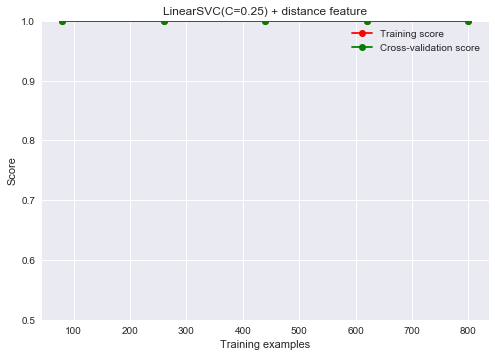

In [29]:
# 加入原始特征的平方项作为新特征
X_extra = np.hstack((X, X[:, [0]]**2 + X[:, [1]]**2))

plot_learning_curve(LinearSVC(C=0.25), "LinearSVC(C=0.25) + distance feature", X_extra, y, ylim=(0.5, 1.0), train_sizes=np.linspace(.1, 1.0, 5))

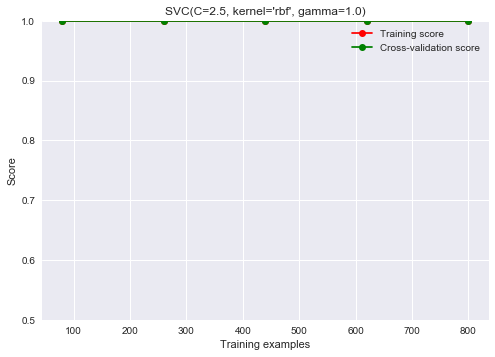

In [30]:
from sklearn.svm import SVC
# note: we use the original X without the extra feature
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0), "SVC(C=2.5, kernel='rbf', gamma=1.0)",X, y, ylim=(0.5, 1.0), train_sizes=np.linspace(.1, 1.0, 5))

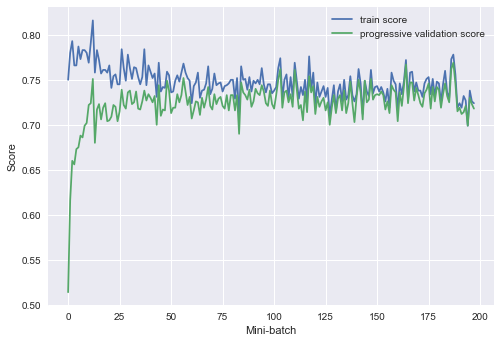

In [31]:
#生成大样本，高纬度特征数据
X, y = make_classification(200000, n_features=200, n_informative=25, n_redundant=0, n_classes=10, class_sep=2, random_state=0)

#用SGDClassifier做训练，并画出batch在训练前后的得分差
from sklearn.linear_model import SGDClassifier
est = SGDClassifier(penalty="l2", alpha=0.001)
progressive_validation_score = []
train_score = []
for datapoint in range(0, 199000, 1000):
    X_batch = X[datapoint:datapoint+1000]
    y_batch = y[datapoint:datapoint+1000]
    if datapoint > 0:
        progressive_validation_score.append(est.score(X_batch, y_batch))
    est.partial_fit(X_batch, y_batch, classes=range(10))
    if datapoint > 0:
        train_score.append(est.score(X_batch, y_batch))

plt.plot(train_score, label="train score")
plt.plot(progressive_validation_score, label="progressive validation score")
plt.xlabel("Mini-batch")
plt.ylabel("Score")
plt.legend(loc='best')  
plt.show()  

Dataset consist of 1797 samples with 64 features each


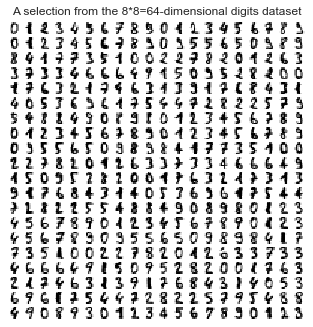

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print("Dataset consist of %d samples with %d features each" % (n_samples, n_features))

# 绘制数字示意图
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
_ = plt.title('A selection from the 8*8=64-dimensional digits dataset')
plt.show()

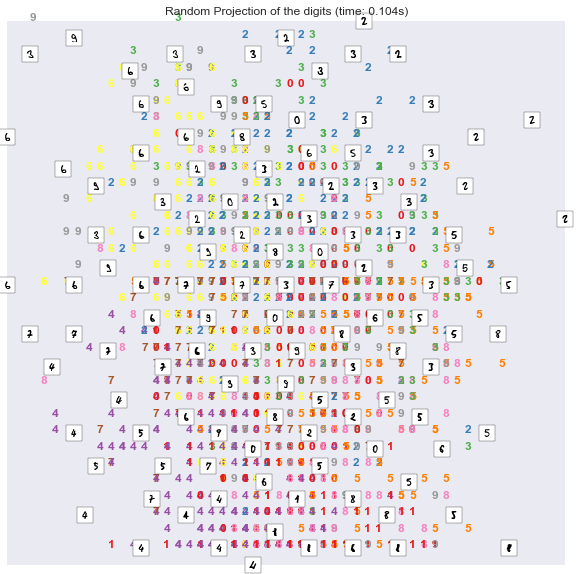

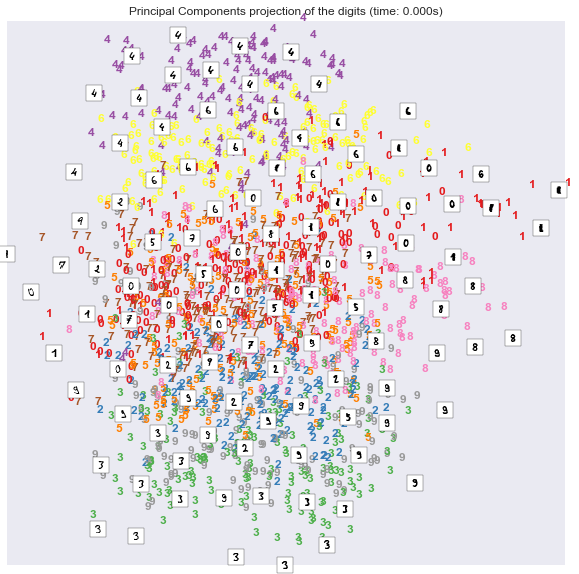

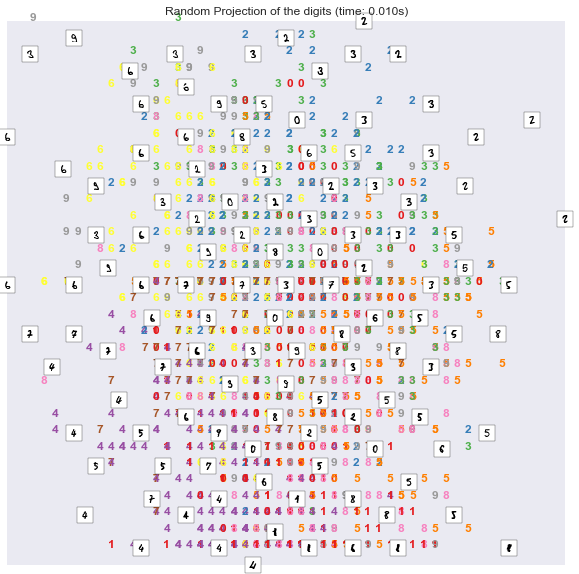

In [40]:
#import所需的package
from sklearn import (manifold, decomposition, random_projection)
import time
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)

#定义绘图函数
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#记录开始时间
start_time = time.time()
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()

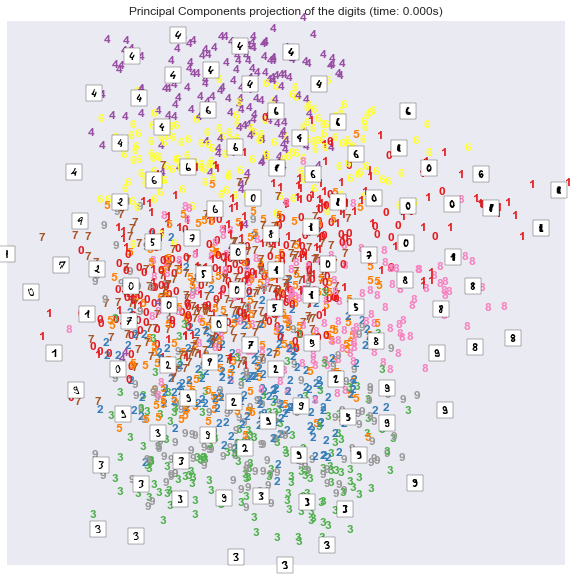

In [41]:
from sklearn import (manifold, decomposition, random_projection)
#TruncatedSVD 是 PCA的一种实现
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
#记录时间
start_time = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" % (time.time() - start_time))
plt.show()

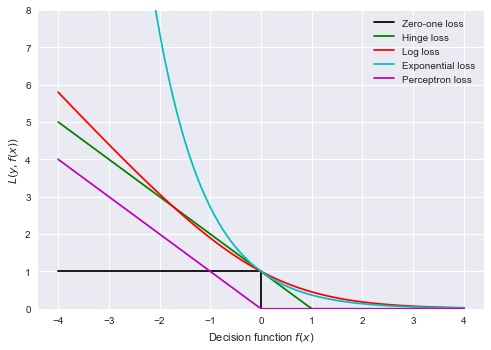

In [43]:
import numpy as np
import matplotlib.pyplot as plt
# 改自http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.exp(-xx), 'c-',
         label="Exponential loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()